## BUILDING A MODEL TO DETECT WHETHER A CELL IS BENIGN OR MALIGNANT USING BREAST CANCER DATASET
BENIGN - Cells are not cancerous and won't spread.
MALIGNANT - Cells are cancerous and can spread to other tissues and organs (HARMFUL)

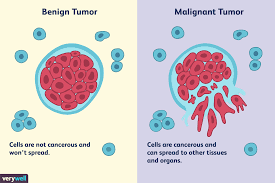

## FIRST STEP IS TO IMPORT LIBARIES

In [87]:
import pandas as pd
import numpy as np


## NEXT WE NEED TO LOAD THE DATASET

In [88]:
Cancer = pd.read_csv('breast-cancer.csv')
Cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [89]:
Cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

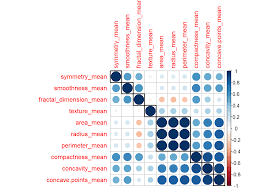

In [90]:
Cancer['diagnosis'].unique()


array(['M', 'B'], dtype=object)

In [91]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## SELECT THE COLUMNS YOU WANT TO WORK WITH, IN THIS CASE IDENTIFYING THE 'FEATURES'(INDEPENDENT) & 'LABEL'(DEPENDENT)

In [92]:
Cancer.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
Cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [93]:
Cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## REPLACING TO MAKE IT MORE UNDERSTANDABLE AND INTERPRETABLE

In [94]:
Cancer=Cancer.replace({'M':1, 'B':0})
Cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## FEATURES(INDEPENDENT)

In [95]:
x = Cancer.drop(["diagnosis"], axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## LABEL (DEPENDENT)

In [96]:
y = Cancer['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## NEXT WE TRAIN AND TEST OUR DATASET, IN ORDER TO DO SO, WE HAVE TO IMPORT THE NEEDED LIBARIES

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



## TRAINING & TESTING THE DATASET

## LOGISTIC REGRESSION

In [98]:
##Cancer.to_excel('CAN.xlsx')

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42 )

Loreg = LogisticRegression()
Loreg.fit(x_train, y_train)
Loreg_C = np.array([[19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
]])
Loreg.predict(Loreg_C)

C:\Users\user\Anaconda32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1], dtype=int64)

In [100]:
predict_type = Loreg.predict(x_test)

print("This model is "  + str(accuracy_score(y_test,predict_type)*100) + " percent accurate")

This model is 95.6140350877193 percent accurate


## CHECKING ACCURACY USING CROSS VAL SCORE

In [101]:
Cross_val = cross_val_score(Loreg,x, y, cv = 10)
Cross_val

C:\Users\user\Anaconda32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.94827586, 0.9137931 , 0.92982456, 0.94736842, 0.96491228,
       0.96491228, 0.94736842, 0.94642857, 0.96428571, 0.96428571])

## CHECKING ACCURACY USING CONFUSION MATRIX

In [102]:
Con_Max = confusion_matrix(y_test, predict_type)
Con_Max

array([[70,  1],
       [ 4, 39]], dtype=int64)

## CHECKING ACCURACY USING CLASSIFICATION REPORT

In [103]:
Rep = classification_report(y_test, predict_type)
print(Rep)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## ROC CURVE

C:\Users\user\Anaconda32\lib\site-packages\sklearn\linear_model\logistic.py:1438: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


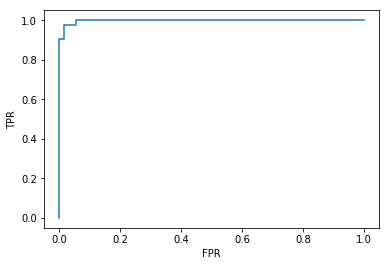

In [104]:
y_prob= Loreg.predict_log_proba(x_test)
y_prob= y_prob[:,1]
FPR, TPR, Thresholds = roc_curve(y_test,y_prob)
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [105]:
roc_auc_score(y_test, y_prob)*100

99.77071732721913

## DECISION TREE MODEL

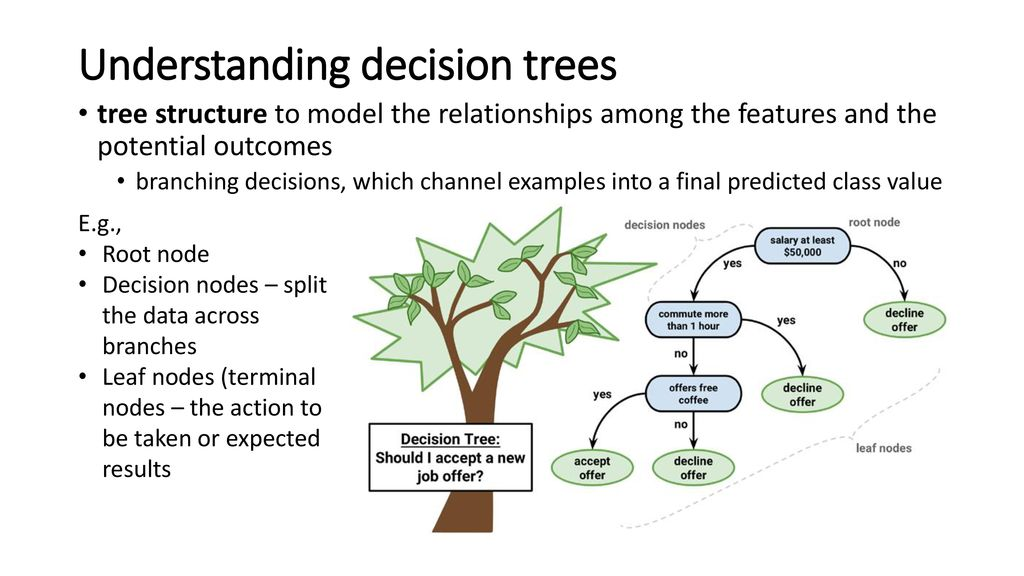

In [106]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
pred_DT=DT.predict(x_test)
print("This model is:", accuracy_score(y_test, pred_DT))

This model is: 0.9385964912280702


## ROC CURVE FOR DT

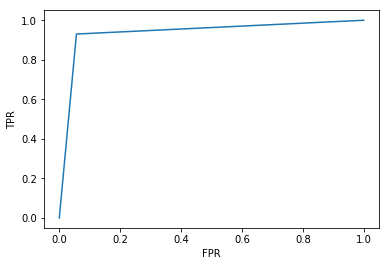

In [107]:
y_probDT = DT.predict_proba(x_test)
y_probDT = y_probDT[:,1]
FPR, TPR, Thresholds = roc_curve(y_test,y_probDT)
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [108]:
roc_auc_score(y_test, y_probDT)*100

93.69472649852602

## K NEAREST NEIGHBOR (KNN) MODEL

In [109]:
KNN = KNeighborsClassifier(n_neighbors= 6, metric ='minkowski', p = 1)

KNN.fit(x_train,y_train)

y_pred = KNN.predict(x_train)
predicted_type = KNN.predict(x_test)

print("This model is "  + str(accuracy_score(y_test,predicted_type)*100) + " percent accurate")


This model is 94.73684210526315 percent accurate


## ROC CURVE FOR KNN

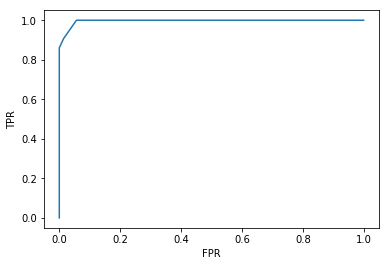

In [110]:
y_probknn = KNN.predict_proba(x_test)
y_probknn = y_probknn[:,1]
FPR, TPR, Thresholds = roc_curve(y_test,y_probknn)
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [111]:
roc_auc_score(y_test, y_probknn)*100

99.63969865705863

## NAIVE BAYES MODEL

In [112]:
GB = GaussianNB()
GB.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [113]:
GB_x = np.array([[19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
]])
GB.predict(GB_x)

array([1], dtype=int64)

In [114]:
predicted = GB.predict(x_test)
accuracy_score(y_test,predicted)

0.9736842105263158

In [115]:
Con_Max1 = confusion_matrix(y_test, predicted)
Con_Max1

array([[71,  0],
       [ 3, 40]], dtype=int64)

In [116]:
Rep2 = classification_report(y_test, predicted)
print(Rep2)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

   micro avg       0.97      0.97      0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## ROC CURVE

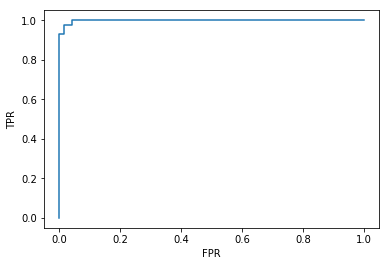

In [117]:
y_probgb = GB.predict_proba(x_test)
y_probgb = y_probgb[:,1]
FPR, TPR, Thresholds = roc_curve(y_test,y_probgb)
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [118]:
roc_auc_score(y_test, y_probgb)*100

99.83622666229938

In [119]:
sv = SVC(kernel = "linear", probability = True)
sv.fit(x_train, y_train)
pred_sv = sv.predict(x_test)
accuracy_score(y_test, pred_sv)

0.956140350877193

## ROC CURVE FOR SVM

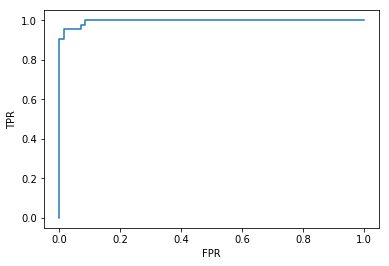

In [120]:
y_probsv = sv.predict_proba(x_test)
y_probsv = y_probsv[:,1]
FPR, TPR, Thresholds = roc_curve(y_test,y_probsv)
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [122]:
roc_auc_score(y_test, y_probsv)*100

99.57418932197838